<a href="https://colab.research.google.com/github/GKonGitHub/FbProphet/blob/master/fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Forecasting Using FbProphet

In [86]:
!pip install pystan
!pip install fbprophet
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
df_train=pd.read_csv('/content/drive/MyDrive/energyhubtech/task4/fbprophet-energyhub/consumption_training_data_apr21.csv')



In [133]:
df_train = df_train.loc[:, ~df_train.columns.str.contains('^Unnamed')]

In [134]:
col_list = ['meter_id', 'element_uuid', 'active_generation_kwh']
df_train = df_train.drop(col_list, axis = 1)


In [135]:
df_train.head()

,start_timestamptz_ts,active_consumption_kwh
0,2021-04-04 13:00:00+00,0.0750
1,2021-04-04 13:30:00+00,0.1000
2,2021-04-04 12:00:00+00,0.1312
3,2021-04-04 12:30:00+00,0.1500
4,2021-04-04 11:00:00+00,0.1375


In [136]:
df_train = df_train.rename(columns = {"start_timestamptz_ts" : "ds", "active_consumption_kwh" : "y"})
df_train.head()

,ds,y
0,2021-04-04 13:00:00+00,0.0750
1,2021-04-04 13:30:00+00,0.1000
2,2021-04-04 12:00:00+00,0.1312
3,2021-04-04 12:30:00+00,0.1500
4,2021-04-04 11:00:00+00,0.1375


In [137]:
df_train['ds'].dtype

dtype('O')

In [143]:
df_train['ds'] = pd.to_datetime(df_train['ds'], utc = True)


In [145]:
df_train['ds'] = df_train['ds'].dt.tz_localize(None)

In [151]:
df_train.dropna(axis=0,inplace=True)

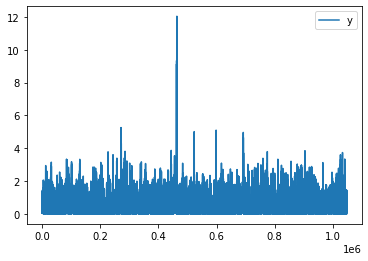

In [138]:
df_train.plot()

In [108]:
#df_train.plot()
#i meter 14 months
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go

# Initialize plotly
init_notebook_mode(connected=True)


In [109]:
def plotly_df(df, title=''):
    """Visualize all the dataframe columns as line plots."""
    common_kw = dict(x=df.index, mode='lines')
    data = [go.Scatter(y=df[c], name=c, **common_kw) for c in df.columns]
    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

In [110]:
plotly_df(df_train, title='Consumption')

In [139]:
from fbprophet import Prophet

In [140]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [153]:
# Initialize the Model
model=Prophet()

In [154]:
model.fit(df_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [155]:
model.component_modes

{'additive': ['weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [156]:
model.plot_components

<bound method Prophet.plot_components of <fbprophet.forecaster.Prophet object at 0x7f81fa97e450>>

In [157]:
future_dates = model.make_future_dataframe(periods=31)

                                           

In [158]:
prediction=model.predict(future_dates)

In [159]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1466,2021-05-27 23:30:00,0.123941,-1.200902,1.333998,-1.110048,1.321714,-0.018264,-0.018264,-0.018264,-0.0138,-0.0138,-0.0138,-0.004463,-0.004463,-0.004463,0.0,0.0,0.0,0.105678
1467,2021-05-28 23:30:00,0.122460,-1.337479,1.454136,-1.168191,1.397429,-0.012993,-0.012993,-0.012993,-0.0138,-0.0138,-0.0138,0.000807,0.000807,0.000807,0.0,0.0,0.0,0.109467
1468,2021-05-29 23:30:00,0.120979,-1.311038,1.499435,-1.243286,1.462638,-0.002976,-0.002976,-0.002976,-0.0138,-0.0138,-0.0138,0.010825,0.010825,0.010825,0.0,0.0,0.0,0.118004
1469,2021-05-30 23:30:00,0.119498,-1.338300,1.575894,-1.315184,1.544064,-0.020965,-0.020965,-0.020965,-0.0138,-0.0138,-0.0138,-0.007165,-0.007165,-0.007165,0.0,0.0,0.0,0.098533
1470,2021-05-31 23:30:00,0.118017,-1.486260,1.630999,-1.372360,1.611838,-0.011811,-0.011811,-0.011811,-0.0138,-0.0138,-0.0138,0.001989,0.001989,0.001989,0.0,0.0,0.0,0.106206


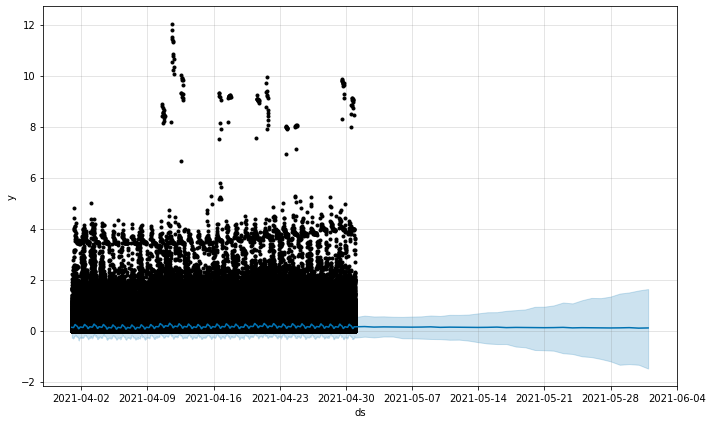

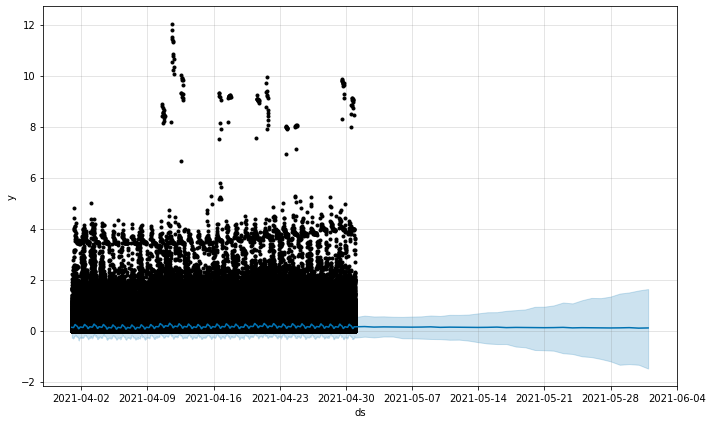

In [160]:
### plot the predicted projection
model.plot(prediction)

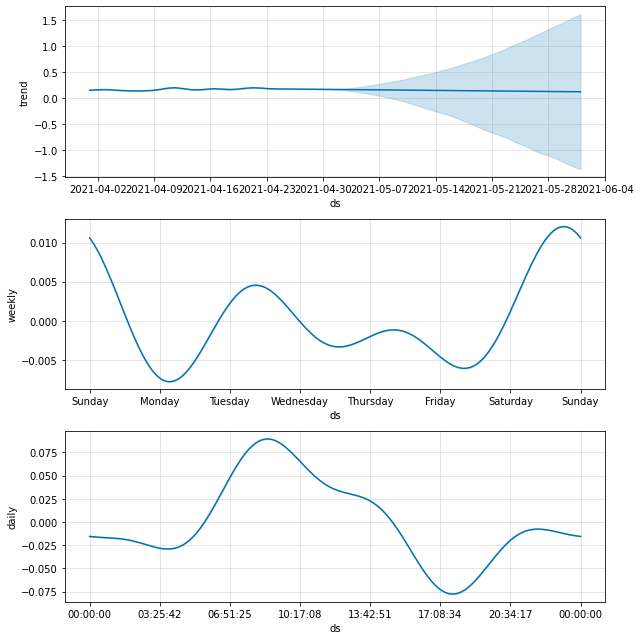

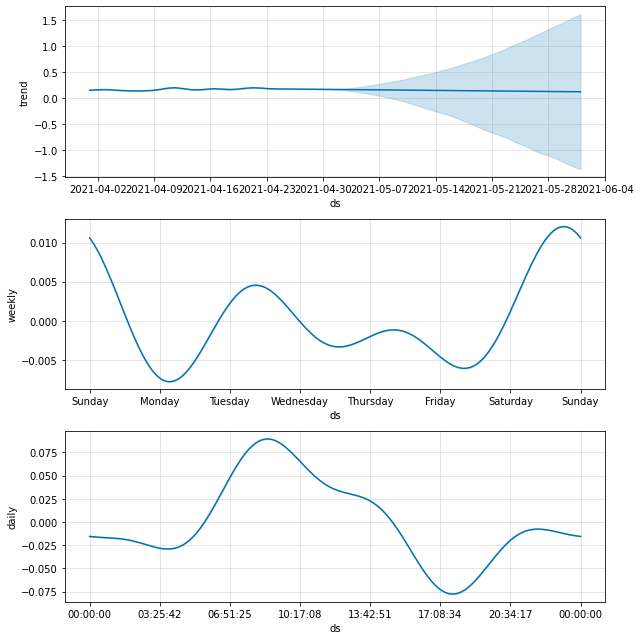

In [161]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)